### 泰勒展开

对于$f(x + dx)$进行泰勒展开为:

$$
f(x + dx) = \sum_{n=0}^{\infty} \frac{f^{(n)} (x)}{n!} dx^n 
$$

故因此有:

$$
af(x+dx) = a[f(x) + f'(x)dx + \frac{1}{2!}f''(x)dx^2] \\
bf(x) = b[f(x)] \\
cf(x-dx) = c[f(x) - f'(x)dx + \frac{1}{2!}f''(x)dx^2]
$$

将上式子左右分别相加有:
$$
af(x+dx) + bf(x) + cf(x-dx) = (a+b+c)f(x) + (a-c)f'(x)dx + (a+c)\frac{1}{2!}f''(x)dx^2
$$

1. 若令 $a + b + c = 0$，则式子右边第一项为零，消去
2. 若令 $a + c = 0$，则式子右边第三项为零，消去
3. 若令 $a - c = \frac{1}{dx}$，此时则有:

$$
af(x+dx) + bf(x) + cf(x-dx) = f'(x)
$$

至此，构建了上述等式，要求出f'(x)，只需求出系数$a, b, c$即可，由上述条件则可构建矩形求解系数$a, b, c$

$$
\begin{cases}
a + b + c = 0 \\
a - c = \frac{1}{dx} \\
a + c = 0
\end{cases}
$$

解得：
$$
a = \frac{1}{2dx}, b = 0, c = -\frac{1}{2dx}
$$

代入上述等式，即可推导出中心有限差分格式:
$$
f'(x) = \frac{f(x+dx) - f(x-dx)}{2dx}
$$

以此类推，即可推出有限差分二阶三阶...导数原始定义

In [2]:
# Import libaries
import math
import numpy as np
import matplotlib.pyplot as plt

# Define function to calculate Taylor operators
def central_difference_coefficients(nop, n):
    """
    Calculate the central finite difference stencil for an arbitrary number
    of points and an arbitrary order derivative.
    
    :param nop: The number of points for the stencil. Must be
        an odd number.
    :param n: The derivative order. Must be a positive number.
    """
    m = np.zeros((nop, nop))
    for i in range(nop):
        for j in range(nop):
            dx = j - nop // 2
            m[i, j] = dx ** i
            print(m[i][j], end=" ")
        print()
    
    s = np.zeros(nop)
    s[n] = math.factorial(n)
    
    # The following statement return oper = inv(m) s
    oper = np.linalg.solve(m, s)
    # Calculate operator
    return oper

###

这个函数的形式为: 以 $3$点差分举例 \\
3(0, 1, 2)点差分的中心点为'1'(3 // 2) \\
因此第一步是将每一列转化为当前点距离中心点的距离

例如:   
$$
dx[i - 1] \, \, \, dx[i] \, \, \, dx[i+1]
$$

其中$dx[i]$为中心点，第一步就是将其转为索引 $i - 1, \, \, i, \, \, i + 1$

第二步则是给索引表上为几次方, 比如 $dx[i]^0, dx[i]^1, dx[i]^2 ...$

$$
m[i, j] = \begin{bmatrix}
dx[i - 1]^0 & dx[i]^0 & dx[i + 1]^0 \\
dx[i - 1]^1 & dx[i]^1 & dx[i + 1]^1 \\
dx[i - 1]^2 & dx[i]^2 & dx[i + 1]^2 
\end{bmatrix}
$$

In [4]:
# Calculate and plot Taylor operator

# Give length of operator (odd)
nop = 3
# Give order of derivative (0 - interpolation, 1 - first derivative, 2 - second derivative)
n = 1

# Get operator from routine 'central_difference_coefficients'
oper = central_difference_coefficients(nop, n)
print(oper)

1.0 1.0 1.0 
-1.0 0.0 1.0 
1.0 0.0 1.0 
[-0.5  0.   0.5]


### 求解f'(x)

与上推导同理，已知dx^{...}, n!{...}, 求解$Ax = b$，即可得到系数$a, b, c...$，至此再推导出$f'(x)$

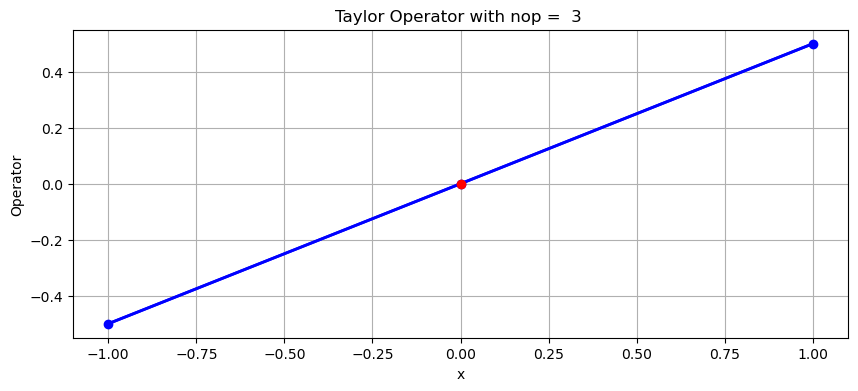

In [5]:
# Plot operator
x = np.linspace(-(nop - 1) / 2, (nop - 1) / 2, nop)

# Simple plot with operator
plt.figure(figsize=(10, 4))
plt.plot(x, oper,lw=2,color='blue')
plt.plot(x, oper,lw=2,marker='o',color='blue')
plt.plot(0, 0,lw=2,marker='o',color='red')
#plt.plot (x, nder5-ader, label="Difference", lw=2, ls=":")
plt.title("Taylor Operator with nop =  %i " % nop )
plt.xlabel('x')
plt.ylabel('Operator')
plt.grid()
plt.show()